# NumPy Notes from McKinney Chapter 4

In [1]:
# Quick example of numpy array vs. base python computation times
import numpy as np
my_arr = np.arange(10**6)
my_list = list(range(10**6))

In [2]:
# Double each item in the array (probably >10 times faster)
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 24.2 ms


In [3]:
# Double each item in the list
%time for _ in range(10): my_list2 = [2*i for i in my_list]

Wall time: 1.59 s


# 4.1 The NumPy ndarray: A Multidimensional Array Object

In [4]:
# Generate random data
data = np.random.randn(2,3)
data

array([[ 0.11962277, -1.98560156, -0.9882956 ],
       [-0.55559645, -1.19808254, -0.07851133]])

In [5]:
data*10

array([[  1.19622772, -19.8560156 ,  -9.88295602],
       [ -5.55596454, -11.98082541,  -0.78511334]])

In [6]:
data+data

array([[ 0.23924554, -3.97120312, -1.9765912 ],
       [-1.11119291, -2.39616508, -0.15702267]])

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype

dtype('float64')

In [9]:
# Creating ndarrays
data1 = [6, 7.5, 8, 0, 1]
data1 = np.array(data1)
data1

array([6. , 7.5, 8. , 0. , 1. ])

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
data2 = np.array(data2)
data2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [11]:
data2.dtype

dtype('int32')

In [12]:
data2.ndim

2

In [13]:
data2.shape

(2, 4)

In [14]:
# Can also initialize arrays with zeros, ones, ranges, identity values, etc.
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [16]:
# Note: empty fills array with garbage values, not necessarily zeros
np.empty((2,3,2))

array([[[8.31544529e-312, 2.81617418e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.11260619e-306, 1.33664410e+160]],

       [[7.42618831e-091, 1.10587274e+165],
        [1.56108925e+184, 2.78796368e+179],
        [6.48224659e+170, 4.93432906e+257]]])

In [17]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Data Types for ndarrays

In [18]:
# Numpy generally picks suitable datatypes, but you can also specify them
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [19]:
# Can change the datatype of entire arrays, but this may result in truncation
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int32
float64


In [20]:
# Float to int
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.astype(np.int32))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]


In [21]:
# String to floats
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings.astype(float))

[ 1.25 -9.6  42.  ]


In [22]:
# Use another object's dtype attribute
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

# Arithmetic with NumPy Arrays

In [23]:
# Operations with numpy are vectorized, i.e. they perform batch operations without looping
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [24]:
# Addition is element-wise
arr + arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [25]:
# Ditto multiplication
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [26]:
# Ditto subtraction
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [28]:
# Ditto comparisons
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

# Basic Indexing and Slicing

In [29]:
# Slicing is similar to working with Python lists
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
arr[5]

5

In [31]:
arr[5:8]

array([5, 6, 7])

In [32]:
# Note that assignment is broadcasted, i.e. you can assign one scalar to multiple array positions
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [33]:
# Note that slices are not copies, i.e. slices are read from original data location
    # Implication: mutating slices also mutates the original data structure
arr_slice = arr[5:8]
print(arr_slice)
arr_slice[1] = 12345
print(arr)

[12 12 12]
[    0     1     2     3     4    12 12345    12     8     9]


In [34]:
# The bare operator [:] applies to an entire array
arr_slice[:] = 64
print(arr)

[ 0  1  2  3  4 64 64 64  8  9]


In [35]:
# Higher dimensional arrays have more options
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [36]:
arr2d[0]

array([1, 2, 3])

In [37]:
arr2d[0][2]

3

In [38]:
arr2d[0,2]

3

In [39]:
# 3d array
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [40]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
# Make copy of this array
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [43]:
# All values with index starting with [1,0]
arr3d[1,0]

array([7, 8, 9])

In [44]:
# Slice syntax is similar to base Python
print(arr)
arr[1:6]

[ 0  1  2  3  4 64 64 64  8  9]


array([ 1,  2,  3,  4, 64])

In [45]:
print(arr2d)
arr2d[:2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [47]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [48]:
# Slicing for assignment
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

# Boolean Indexing

In [49]:
# Array of names
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [50]:
# Data where rows correspond to names
data = np.random.randn(7, 4)
data

array([[ 0.38935201, -0.49869857, -0.63790661, -1.57972214],
       [-1.31889411,  1.74118474, -2.13399913, -0.2453008 ],
       [-0.35078222,  0.53119313,  1.40697632,  1.63941033],
       [ 0.15543077, -0.85228158, -0.82960843, -0.05138064],
       [-2.15444267,  0.3603997 , -0.145431  , -0.07108275],
       [-0.81783006,  1.10435666,  0.20567547, -0.6653919 ],
       [-2.35627493, -0.91263911, -0.61983621,  0.46977237]])

In [51]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [52]:
# Corresponding data
data[names=="Bob"]

array([[ 0.38935201, -0.49869857, -0.63790661, -1.57972214],
       [ 0.15543077, -0.85228158, -0.82960843, -0.05138064]])

In [53]:
# Select specific columns with this condition
data[names=="Bob", :2]

array([[ 0.38935201, -0.49869857],
       [ 0.15543077, -0.85228158]])

In [54]:
data[names=="Bob", 3]

array([-1.57972214, -0.05138064])

In [55]:
# Negation
data[names!="Bob"]

array([[-1.31889411,  1.74118474, -2.13399913, -0.2453008 ],
       [-0.35078222,  0.53119313,  1.40697632,  1.63941033],
       [-2.15444267,  0.3603997 , -0.145431  , -0.07108275],
       [-0.81783006,  1.10435666,  0.20567547, -0.6653919 ],
       [-2.35627493, -0.91263911, -0.61983621,  0.46977237]])

In [56]:
# Negating a condition
cond = names == "Bob"
data[~cond]

array([[-1.31889411,  1.74118474, -2.13399913, -0.2453008 ],
       [-0.35078222,  0.53119313,  1.40697632,  1.63941033],
       [-2.15444267,  0.3603997 , -0.145431  , -0.07108275],
       [-0.81783006,  1.10435666,  0.20567547, -0.6653919 ],
       [-2.35627493, -0.91263911, -0.61983621,  0.46977237]])

In [57]:
# Multiple conditions
mask = (names=="Bob") | (names=="Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [58]:
data[mask]

array([[ 0.38935201, -0.49869857, -0.63790661, -1.57972214],
       [-0.35078222,  0.53119313,  1.40697632,  1.63941033],
       [ 0.15543077, -0.85228158, -0.82960843, -0.05138064],
       [-2.15444267,  0.3603997 , -0.145431  , -0.07108275]])

In [59]:
# Conditional assignment
data[data<0] = 0
data

array([[0.38935201, 0.        , 0.        , 0.        ],
       [0.        , 1.74118474, 0.        , 0.        ],
       [0.        , 0.53119313, 1.40697632, 1.63941033],
       [0.15543077, 0.        , 0.        , 0.        ],
       [0.        , 0.3603997 , 0.        , 0.        ],
       [0.        , 1.10435666, 0.20567547, 0.        ],
       [0.        , 0.        , 0.        , 0.46977237]])

In [60]:
data[names!="Joe"] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.74118474, 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.10435666, 0.20567547, 0.        ],
       [0.        , 0.        , 0.        , 0.46977237]])

# Fancy Indexing

In [61]:
arr = np.empty((8, 4))
for i in range(8): arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [62]:
# Can pass lists to select rows/columns in particular orders, with duplicates if desired
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [63]:
# Select from the end
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [64]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [65]:
# Using multiple lists returns elements corresponding to the tuples of the indices
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [66]:
# To get a subset, can slice like this:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

# Transposing Arrays and Swapping Axes

In [67]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [68]:
# Transpose
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [69]:
arr = np.random.randn(6, 3)
arr

array([[ 0.84623316,  1.31553399, -1.5488439 ],
       [-1.10081967,  0.53529557, -0.25251848],
       [-1.10776935, -0.74346864,  0.16082122],
       [ 1.62535506,  0.11062088, -1.10042567],
       [-1.00034067,  0.64558333, -0.20433449],
       [-0.58854945, -1.79502544,  0.09754089]])

In [70]:
# Inner product
np.dot(arr.T, arr)

array([[ 7.14391841,  1.93803255, -2.85244454],
       [ 1.93803255,  6.22104778, -2.72102773],
       [-2.85244454, -2.72102773,  3.75074993]])

In [71]:
# Note: axis swapping works differently in higher dimensions, but numpy still supports it

# 4.2 Universal Functions: Fast Element-Wise Array

In [72]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [74]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [75]:
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x,y)

array([0.21039597, 1.92015794, 0.75778762, 0.11678589, 2.25162751,
       0.24883662, 0.87326191, 1.56302685])

In [76]:
arr = np.random.randn(7) * 5
arr

array([ 0.94735779,  0.92365622, -9.93964696,  9.12053759,  3.31661396,
        2.05079071,  9.20192434])

In [77]:
remainder, quotient = np.modf(arr)
print(remainder)
print(quotient)

[ 0.94735779  0.92365622 -0.93964696  0.12053759  0.31661396  0.05079071
  0.20192434]
[ 0.  0. -9.  9.  3.  2.  9.]


In [78]:
# Can provide arguments to operate in place
print(arr)
print(np.sqrt(arr))
np.sqrt(arr, arr)
print(arr)

[ 0.94735779  0.92365622 -9.93964696  9.12053759  3.31661396  2.05079071
  9.20192434]
[0.97332306 0.96107035        nan 3.02002278 1.82115731 1.43205821
 3.03346738]
[0.97332306 0.96107035        nan 3.02002278 1.82115731 1.43205821
 3.03346738]


<ipython-input-78-7969cd392554>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(arr))
<ipython-input-78-7969cd392554>:4: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


# 4.3 Array-Oriented Programming with Arrays

In [79]:
# 1000 equally spaced points
points = np.arange(-5, 5, 0.01)
# Grid generated from points
xs, ys = np.meshgrid(points, points)

In [80]:
# Calculate z
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

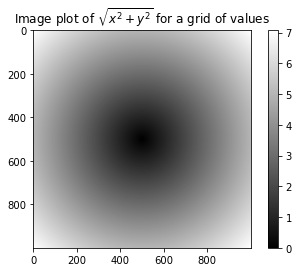

In [81]:
# Plot
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values");

# Expressing Conditional Logic as Array Operations

In [82]:
# Some example data
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [83]:
# Applying condition with base Python
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [84]:
# Numpy method
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [85]:
# With matrices
arr = np.random.randn(4, 4)
arr

array([[ 0.90904176, -0.78260238, -1.41669125, -0.77428575],
       [ 1.67866358,  0.78387612, -0.11321962,  0.96901839],
       [-1.22140378, -0.35654468, -1.56338269,  0.05584279],
       [ 1.10434405,  0.06911622,  1.41496008,  0.35399888]])

In [86]:
arr>0

array([[ True, False, False, False],
       [ True,  True, False,  True],
       [False, False, False,  True],
       [ True,  True,  True,  True]])

In [87]:
# Replace values
np.where(arr>0, 2, -2)

array([[ 2, -2, -2, -2],
       [ 2,  2, -2,  2],
       [-2, -2, -2,  2],
       [ 2,  2,  2,  2]])

In [88]:
# Only change values for part of condition
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.78260238, -1.41669125, -0.77428575],
       [ 2.        ,  2.        , -0.11321962,  2.        ],
       [-1.22140378, -0.35654468, -1.56338269,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

# Mathematical and Statistical Methods

In [89]:
# np arrays have built-in methods for aggregations
arr = np.random.randn(5, 4)
arr

array([[ 0.03502715,  0.65483359, -1.06525818, -0.78371679],
       [-0.69425971,  1.34303944, -1.84124871,  0.58476953],
       [-0.05560884,  1.11917471,  1.57974034, -0.48600465],
       [-0.80352249, -0.85976524, -0.53897757, -1.02913013],
       [ 0.19908441, -0.05839325,  0.40454185, -1.12574774]])

In [90]:
arr.mean()

-0.17107111329225422

In [91]:
np.mean(arr)

-0.17107111329225422

In [92]:
arr.sum()

-3.4214222658450844

In [93]:
# Can also apply to axes
arr.mean(axis=0)

array([-0.2638559 ,  0.43977785, -0.29224045, -0.56796595])

In [94]:
arr.sum(axis=1)

array([-1.15911422, -0.60769945,  2.15730156, -3.23139543, -0.58051473])

In [95]:
# Some methods do not produce scalar results
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

# Methods for Boolean Arrays

In [96]:
# Counting number of trues
arr = np.random.randn(100)
(arr>0).sum()

53

In [97]:
bools = np.array([False, False, True, False])

In [98]:
# Any trues?
bools.any()

True

In [99]:
# All trues?
bools.all()

False

# Sorting

In [100]:
arr = np.random.randn(6)
arr

array([-0.35110287, -0.86735088, -1.57421878,  2.13145262, -1.29925836,
        0.02109629])

In [101]:
arr.sort()
arr

array([-1.57421878, -1.29925836, -0.86735088, -0.35110287,  0.02109629,
        2.13145262])

In [102]:
# Sort along rows
arr = np.random.randn(5, 3)
arr.sort(1)
arr

array([[-0.08737193,  0.11275076,  2.32780798],
       [-0.31760315,  0.1656732 ,  0.43924483],
       [ 0.01923513,  0.38166697,  0.97831274],
       [-0.93240798, -0.90342215,  0.72579408],
       [ 0.05167907,  0.10222838,  2.33465782]])

In [103]:
# Finding quantile in an array
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]

-1.6774138211514702

# Unique and Other Set Logic

In [104]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [105]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [106]:
# Set inclusion
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# 4.4 File Input and Output with Arrays

In [107]:
# Save array
arr = np.arange(10)
np.save('some_array', arr)

In [108]:
# Load array
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
# Save multiple arrays
np.savez('array_archive.npz', a=arr, b=arr)

In [110]:
# Load multiples arrays as dict object
arch = np.load('array_archive.npz')
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [111]:
# Save array to compressed file
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

# 4.5 Linear Algebra

In [112]:
# * is elementwise multiplication in numpy, so need to use dot or @
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [113]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [114]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [115]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [116]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [117]:
# Matrix multiplied by vector words as expected
np.dot(x, np.ones(3))

array([ 6., 15.])

In [118]:
# Numpy has a bunch of basic inverse, determinant, decomposition functions
from numpy.linalg import inv, qr

In [119]:
X = np.random.randn(5, 5)
X = X.T.dot(X)
X

array([[ 5.16412672,  0.31691045, -2.20392202, -1.49284115, -0.20997083],
       [ 0.31691045,  7.80406334, -4.32803342, -2.12884093,  1.23257494],
       [-2.20392202, -4.32803342,  5.60177998, -1.23999394, -1.43976245],
       [-1.49284115, -2.12884093, -1.23999394,  5.90331663, -0.94491929],
       [-0.20997083,  1.23257494, -1.43976245, -0.94491929,  5.44341028]])

In [120]:
inv(X)

array([[1.33531044, 1.29539991, 1.93939027, 1.29147545, 0.49533289],
       [1.29539991, 1.62721884, 2.22627925, 1.46602677, 0.5248396 ],
       [1.93939027, 2.22627925, 3.344562  , 2.12780388, 0.82469203],
       [1.29147545, 1.46602677, 2.12780388, 1.55987368, 0.5514321 ],
       [0.49533289, 0.5248396 , 0.82469203, 0.5514321 , 0.39782428]])

In [121]:
X.dot(inv(X))

array([[ 1.00000000e+00, -6.46350873e-16,  4.85960462e-16,
         5.38054376e-16, -2.84282664e-16],
       [ 1.74010672e-15,  1.00000000e+00,  1.33343573e-15,
         7.88704884e-16,  6.54557061e-16],
       [-1.28125341e-15,  2.07739820e-17,  1.00000000e+00,
        -9.60508923e-16,  3.93203609e-16],
       [ 7.38238121e-16, -1.46536162e-16, -2.61030938e-15,
         1.00000000e+00, -2.09801609e-17],
       [-1.31446277e-16, -5.25531429e-16, -1.01812622e-15,
        -1.43553619e-16,  1.00000000e+00]])

In [122]:
q, r = qr(X)
q

array([[-0.8869644 ,  0.25039329,  0.00859846, -0.0548631 ,  0.38407481],
       [-0.05443094, -0.8678269 , -0.12336257, -0.2511651 ,  0.40695394],
       [ 0.37853455,  0.36882491, -0.55638448, -0.04703737,  0.63945569],
       [ 0.25640288,  0.15874755,  0.79666912, -0.30258231,  0.42757342],
       [ 0.03606353, -0.15148288,  0.20115258,  0.91659019,  0.30846787]])

In [123]:
r

array([[-5.82224799, -2.84557094,  3.94098565,  2.45014149, -0.47182482],
       [ 0.        , -8.81417272,  5.29146595,  2.09660353, -2.62784434],
       [ 0.        ,  0.        , -3.87925323,  5.45261368,  0.98937044],
       [ 0.        ,  0.        ,  0.        , -1.97742443,  5.04495479],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.77538725]])

# 4.6 Pseudorandom Number Generation

In [124]:
# As we would expect, numpy generates random numbers in batches
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.65298902,  0.54660375, -0.47273125,  1.81706792],
       [ 1.74273719,  1.29198442, -0.46211445,  0.62750416],
       [-0.5891934 ,  0.40633592,  0.17658486,  0.2098209 ],
       [-0.36121753,  1.19748981,  0.05844764,  0.10992197]])

In [125]:
from random import normalvariate
N = 10**6

In [126]:
# Base Python
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.97 s ± 230 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [127]:
# Numpy
%timeit np.random.normal(size=N)

54.4 ms ± 6.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [128]:
# Setting a numpy seed
np.random.seed(1234)

In [129]:
# Set something to run independent of the current seed
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.7 Example: Random Walks

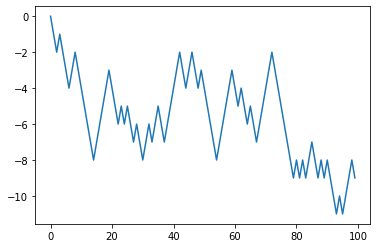

In [130]:
# Base Python Example
import random
position = 0
walk = [position]
steps = 10**3
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:100]);

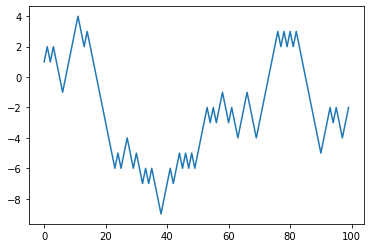

In [131]:
# Using numpy
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:100]);

In [132]:
walk.min()

-9

In [133]:
walk.max()

60

In [134]:
# First time over 10 away from origin
(np.abs(walk) >= 10).argmax()

297

# Simulating Many Random Walks at Once

In [135]:
# Repeat the random walk from the last example many times
nwalks = 5*10**3
nsteps = 10**3
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [136]:
# Now the min/max functions return the min/max across all 5,000 walks
walks.max()

122

In [137]:
walks.min()

-128

In [138]:
# Which walks hit +/- 30?
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [139]:
# How many hit +/- 30?
hits30.sum()

3368

In [140]:
# What was the average steps to reach +/- 30?
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787